# Word Vector

## use word vector to read a novel, like below code use word vector to read relateship for nvoel: pride and prejudice"

based on Thrones2Vec to do this experiments

In [ ]:
# download Pride and Prejudice as training
# good luck gutenberg use utf-8 as .txt encoding

In [5]:
!curl -O http://www.gutenberg.org/files/1342/1342-0.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  709k  100  709k    0     0  29638      0  0:00:24  0:00:24 --:--:-- 23902


In [7]:
!mv  1342-0.txt Pride_and_Prejudice.txt

In [16]:
from __future__ import absolute_import, division, print_function

In [17]:
# step 0
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [18]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [19]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
# step 1: process our data
# clean data
# download package
nltk.download("punkt") # seperate words
nltk.download("stopwords") # remove stop words like and, the an, a , of

# manual download use code python nltk.download()

### as very slow upper command, manual download it via commad:
 > nltk.download(), then selected punkt/stopwords two package

In [20]:
# Prepare Corpus

# load book
book_name = 'Pride_and_Prejudice.txt'

In [21]:
# sample code use below code to combine serval books to one book:
# just save it here as reference:
# use two package:
# 1. codecs:
# 2. glob: book_filenames = glob.glob("data/clean/*.txt"))

corpus_raw = u""

with codecs.open(book_name, "r", "utf-8") as f:
    corpus_raw += f.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Corpus is now 717619 characters long



## Split the corpus into sentences

In [22]:
# step 2: process the data
tokenizer = nltk.data.load('/Users/lang/workplace/nltk_data/punkt/english.pickle')

In [23]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [24]:
#convert into a list of words
#remove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [25]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [26]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

“Do you not want to know who has taken it?” cried his wife impatiently.
['Do', 'you', 'not', 'want', 'to', 'know', 'who', 'has', 'taken', 'it', 'cried', 'his', 'wife', 'impatiently']


In [27]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 125,901 tokens


## Train Word2Vec

In [107]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
# ----- set 2, # set 1
#more dimensions = more generalized
num_features = 200 # 100
# Minimum word count threshold.
min_word_count = 3 # 2 

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [108]:
pap2Vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [49]:
# parameter set 1
pap2Vec.build_vocab(sentences)

2017-04-27 22:17:38,948 : INFO : collecting all words and their counts
2017-04-27 22:17:38,949 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-27 22:17:38,976 : INFO : collected 7026 word types from a corpus of 125901 raw words and 4774 sentences
2017-04-27 22:17:38,981 : INFO : Loading a fresh vocabulary
2017-04-27 22:17:39,004 : INFO : min_count=2 retains 4277 unique words (60% of original 7026, drops 2749)
2017-04-27 22:17:39,005 : INFO : min_count=2 leaves 123152 word corpus (97% of original 125901, drops 2749)
2017-04-27 22:17:39,028 : INFO : deleting the raw counts dictionary of 7026 items
2017-04-27 22:17:39,030 : INFO : sample=0.001 downsamples 62 most-common words
2017-04-27 22:17:39,032 : INFO : downsampling leaves estimated 89753 word corpus (72.9% of prior 123152)
2017-04-27 22:17:39,033 : INFO : estimated required memory for 4277 words and 100 dimensions: 5560100 bytes
2017-04-27 22:17:39,070 : INFO : resetting layer weights


In [109]:
# parameter set 2
pap2Vec.build_vocab(sentences)

2017-04-27 23:32:49,083 : INFO : collecting all words and their counts
2017-04-27 23:32:49,084 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-27 23:32:49,109 : INFO : collected 7026 word types from a corpus of 125901 raw words and 4774 sentences
2017-04-27 23:32:49,110 : INFO : Loading a fresh vocabulary
2017-04-27 23:32:49,131 : INFO : min_count=3 retains 3239 unique words (46% of original 7026, drops 3787)
2017-04-27 23:32:49,132 : INFO : min_count=3 leaves 121076 word corpus (96% of original 125901, drops 4825)
2017-04-27 23:32:49,151 : INFO : deleting the raw counts dictionary of 7026 items
2017-04-27 23:32:49,152 : INFO : sample=0.001 downsamples 65 most-common words
2017-04-27 23:32:49,153 : INFO : downsampling leaves estimated 87375 word corpus (72.2% of prior 121076)
2017-04-27 23:32:49,154 : INFO : estimated required memory for 3239 words and 200 dimensions: 6801900 bytes
2017-04-27 23:32:49,173 : INFO : resetting layer weights


In [72]:
# parameter set 1

print("Word2Vec vocabulary length:", len(pap2Vec.wv.vocab))

Word2Vec vocabulary length: 4277


In [110]:
# parameter set 2

print("Word2Vec vocabulary length:", len(pap2Vec.wv.vocab))

Word2Vec vocabulary length: 3239


In [51]:
# parameter set 1

pap2Vec.train(sentences)

2017-04-27 22:18:08,131 : INFO : training model with 4 workers on 4277 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2017-04-27 22:18:08,132 : INFO : expecting 4774 sentences, matching count from corpus used for vocabulary survey
2017-04-27 22:18:09,159 : INFO : PROGRESS: at 80.93% examples, 355868 words/s, in_qsize 7, out_qsize 0
2017-04-27 22:18:09,334 : INFO : worker thread finished; awaiting finish of 3 more threads
2017-04-27 22:18:09,351 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-04-27 22:18:09,365 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-04-27 22:18:09,399 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-04-27 22:18:09,400 : INFO : training on 629505 raw words (448663 effective words) took 1.3s, 355951 effective words/s


448663

In [111]:
# parameter set 2

pap2Vec.train(sentences)

2017-04-27 23:33:57,628 : INFO : training model with 4 workers on 3239 vocabulary and 200 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2017-04-27 23:33:57,629 : INFO : expecting 4774 sentences, matching count from corpus used for vocabulary survey
2017-04-27 23:33:58,655 : INFO : PROGRESS: at 70.64% examples, 305920 words/s, in_qsize 7, out_qsize 0
2017-04-27 23:33:59,276 : INFO : worker thread finished; awaiting finish of 3 more threads
2017-04-27 23:33:59,289 : INFO : worker thread finished; awaiting finish of 2 more threads
2017-04-27 23:33:59,331 : INFO : worker thread finished; awaiting finish of 1 more threads
2017-04-27 23:33:59,355 : INFO : worker thread finished; awaiting finish of 0 more threads
2017-04-27 23:33:59,356 : INFO : training on 629505 raw words (436888 effective words) took 1.7s, 254003 effective words/s


436888

In [52]:
#Save to file, can be useful later
if not os.path.exists("trained"):
    os.makedirs("trained")

In [112]:
pap2Vec.save(os.path.join("trained", "pap2Vec.w2v"))

2017-04-27 23:34:36,835 : INFO : saving Word2Vec object under trained/pap2Vec.w2v, separately None
2017-04-27 23:34:36,836 : INFO : not storing attribute syn0norm
2017-04-27 23:34:36,837 : INFO : not storing attribute cum_table
2017-04-27 23:34:36,920 : INFO : saved trained/pap2Vec.w2v


## Explore the trained model.

In [113]:
pap2Vec = w2v.Word2Vec.load(os.path.join("trained", "pap2Vec.w2v"))

2017-04-27 23:34:43,379 : INFO : loading Word2Vec object from trained/pap2Vec.w2v
2017-04-27 23:34:43,434 : INFO : loading wv recursively from trained/pap2Vec.w2v.wv.* with mmap=None
2017-04-27 23:34:43,435 : INFO : setting ignored attribute syn0norm to None
2017-04-27 23:34:43,435 : INFO : setting ignored attribute cum_table to None
2017-04-27 23:34:43,436 : INFO : loaded trained/pap2Vec.w2v


In [114]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [115]:
all_word_vectors_matrix = pap2Vec.syn1neg
# pap2Vec.sysn0

In [116]:
#Train t-SNE

all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [117]:
# Plot the big picture

points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[pap2Vec.wv.vocab[word].index])
            for word in pap2Vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [77]:
# parameter set 1

points.head(10)

,word,x,y
0,Allowing,2.045652,3.961221
1,encourage,-2.280656,-9.017808
2,dissatisfied,3.861165,-0.444914
3,cares,3.499702,-1.034036
4,turns,1.338518,7.237345
5,Within,3.030276,5.314199
6,laughed,7.493114,0.335926
7,opposition,0.619293,5.954991
8,Prejudice,6.281127,5.832435
9,cousins,1.584191,-3.778595


In [118]:
# parameter set 2

points.head(10)

,word,x,y
0,encourage,-7.004487,-4.043510
1,dissatisfied,1.451445,-1.207863
2,laughed,7.524324,-2.013730
3,opposition,-2.995836,2.037198
4,Prejudice,7.995738,10.836483
5,cousins,-0.361450,-7.419159
6,caution,-5.971425,5.208639
7,engage,4.677966,-2.747328
8,carry,4.284903,-0.583090
9,residence,-8.652260,-2.702767


In [78]:
sns.set_context('poster')

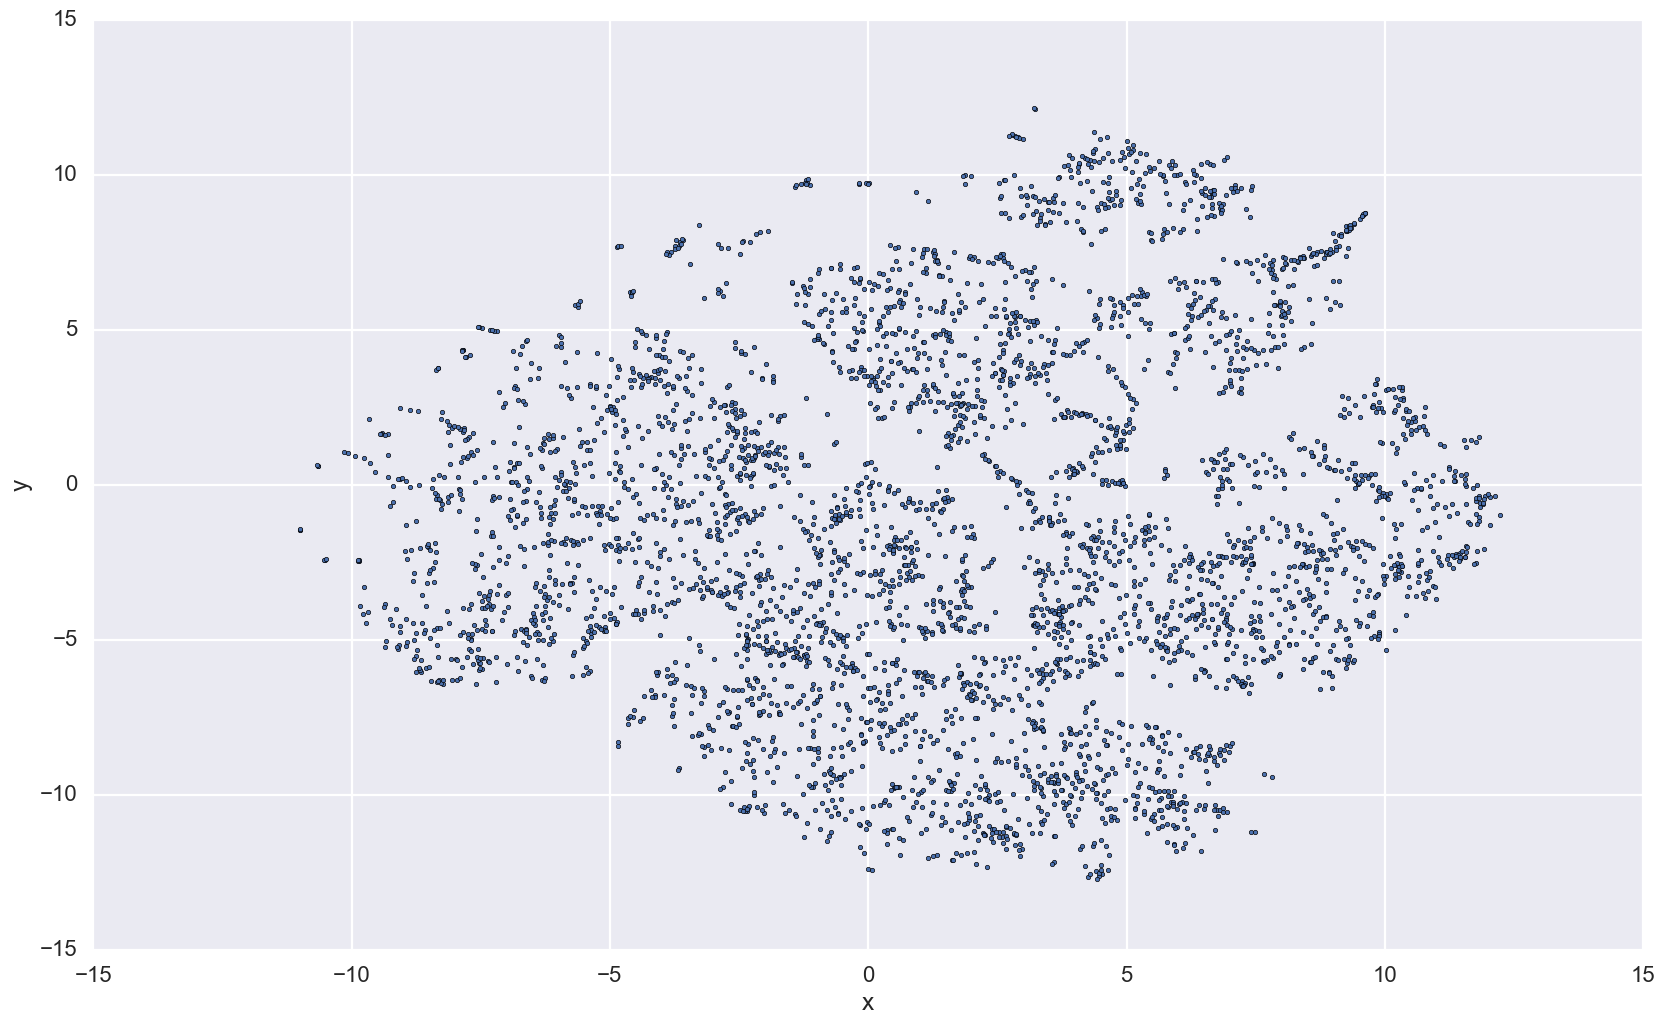

In [79]:
# parameter set 1

points.plot.scatter("x", "y", s=10, figsize=(20, 12))

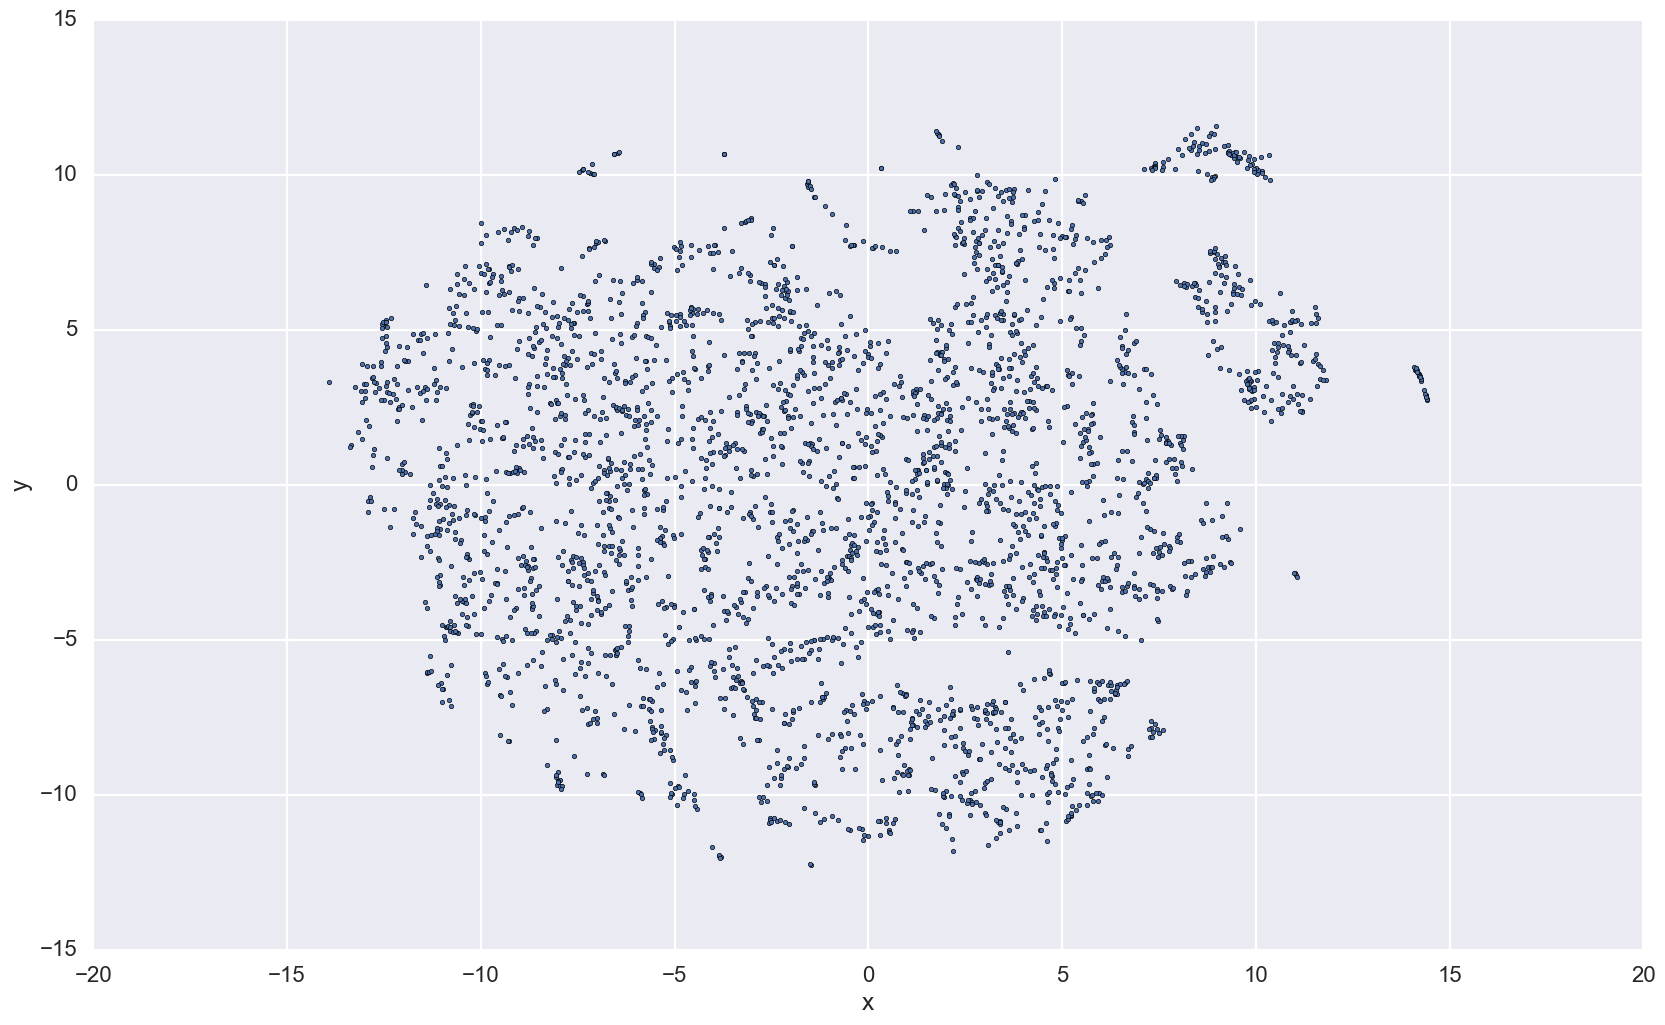

In [119]:
# parameter set 2

points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [90]:
# zoom in  some interesting place
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(8, 6))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

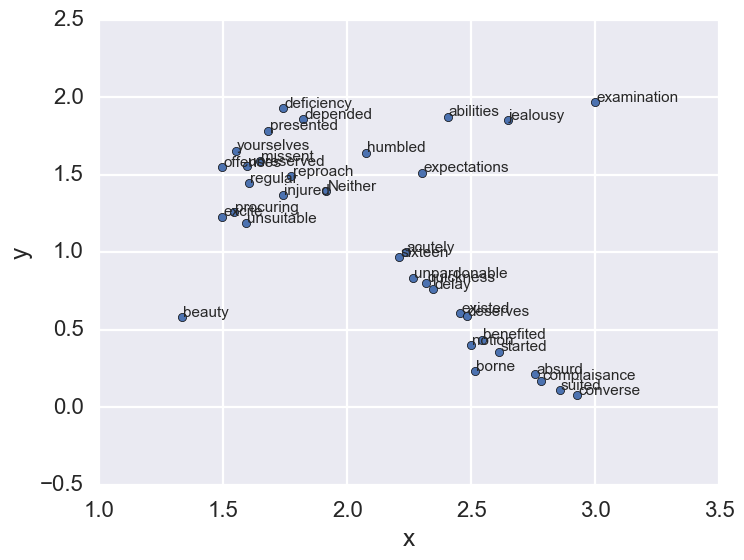

In [94]:
plot_region(x_bounds=(1, 3), y_bounds=(0, 2))

In [ ]:
### Explore semantic similarites between books 

In [99]:
# parameter set 1
pap2Vec.most_similar("Darcy")

2017-04-27 23:09:12,428 : INFO : precomputing L2-norms of word weight vectors


[('Wickham', 0.9487004280090332),
 ('Bingley', 0.928027868270874),
 ('Collins', 0.9132685661315918),
 ('Gardiner', 0.8640314936637878),
 ('Charlotte', 0.8143794536590576),
 ('wife', 0.8088862895965576),
 ('Lydia', 0.8084926605224609),
 ('Fitzwilliam', 0.806614875793457),
 ('called', 0.8024684190750122),
 ('Hurst', 0.800595223903656)]

In [122]:
# parameter set 1
pap2Vec.most_similar("Darcy")

2017-04-27 23:37:53,751 : INFO : precomputing L2-norms of word weight vectors


[('Wickham', 0.9618789553642273),
 ('Collins', 0.9333852529525757),
 ('Bingley', 0.9267357587814331),
 ('Gardiner', 0.8471258282661438),
 ('Fitzwilliam', 0.8387035131454468),
 ('Colonel', 0.8231056928634644),
 ('himself', 0.811468243598938),
 ('Lydia', 0.8070939779281616),
 ('Long', 0.8069422245025635),
 ('Hurst', 0.8013355135917664)]

In [ ]:
# ------------------------

## ??? not understand

comparison two parameter setting the word vector, we can find difference obvious, so what's kind of parameter setting is good? meets the truth requires?

In [ ]:
#___----------------------

In [ ]:
# 4 sistor

In [102]:
pap2Vec.most_similar("Jane")

[('Charlotte', 0.9608283042907715),
 ('Elizabeth', 0.9503086805343628),
 ('Lydia', 0.9432376027107239),
 ('surprised', 0.9396959543228149),
 ('persuaded', 0.9216840267181396),
 ('Fitzwilliam', 0.9211204051971436),
 ('astonished', 0.9204831123352051),
 ('Caroline', 0.9181120991706848),
 ('answer', 0.9178528189659119),
 ('acquainted', 0.9175945520401001)]

In [103]:
pap2Vec.most_similar("Catherine")

[('Lady', 0.8877688050270081),
 ('de', 0.8765159845352173),
 ('Bourgh', 0.8744683265686035),
 ('Lucas', 0.8121616840362549),
 ('Sir', 0.8101511001586914),
 ('William', 0.776416003704071),
 ('daughter', 0.7707617282867432),
 ('Maria', 0.7336544990539551),
 ('observed', 0.7126129865646362),
 ('Lewis', 0.7112901210784912)]

In [104]:
pap2Vec.most_similar("Lydia")

[('Charlotte', 0.9617894887924194),
 ('Jane', 0.9432376027107239),
 ('Colonel', 0.94240802526474),
 ('Caroline', 0.9372855424880981),
 ('astonished', 0.935956597328186),
 ('comes', 0.9306788444519043),
 ('thus', 0.92658531665802),
 ('Fitzwilliam', 0.9250333309173584),
 ('observed', 0.9233637452125549),
 ('etc', 0.9227215051651001)]

In [105]:
pap2Vec.most_similar("Mary")

[('cards', 0.9895082116127014),
 ('incredulous', 0.9892604351043701),
 ('smiled', 0.988664984703064),
 ('mortified', 0.9886217713356018),
 ('impatient', 0.9884995222091675),
 ('Georgiana', 0.9882439970970154),
 ('proposal', 0.9882212281227112),
 ('especially', 0.9878044128417969),
 ('welcome', 0.9875960350036621),
 ('jealousy', 0.9870388507843018)]

In [101]:
#Linear relationships between word pairs

def nearest_similarity_cosmul(start1, end1, end2):
    similarities = pap2Vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [106]:
#cosine similarity
nearest_similarity_cosmul("Jane", "Caroline", "Fitzwilliam")
nearest_similarity_cosmul("Catherine", "William", "Georgiana")
nearest_similarity_cosmul("Darcy", "called", "answer")


Jane is related to Caroline, as Charlotte is related to Fitzwilliam
Catherine is related to William, as far is related to Georgiana
Darcy is related to called, as Wickham is related to answer


'Wickham'